### Problem Statement

Continuing with the same scenario, now that you have been able to successfuly predict each student GPA, now you will classify each Student based on they probability to have a successful GPA score.

The different classes are:

- Low     : Students where final GPA is predicted to be between: 0 and 2
- Medium  : Students where final GPA is predicted to be between: 2 and 3.5
- High    : Students where final GPA is predicted to be between: 3.5 and 5



### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns


### 2) Load Data

- You will use the same file from the previous activity (Student Performance Data)

In [2]:
data = pd.read_csv("C:/Users/PC/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/Documents/DeepLearning/Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 3) Add a new column called 'Profile' this column will have the following information

Based on the value of GPA for each student: 

- If GPA values between 0 and 2 will be labeled 'Low', 
- Values between 2 and 3.5 will be 'Medium', 
- And values between 3.5 and 5 will be 'High'.


In [4]:
# Función para clasificar a los estudiantes según su GPA
def classify_gpa(gpa):
    if gpa <= 2:
        return 'Low'
    elif gpa <= 3.5:
        return 'Medium'
    else: 
        return 'High'
    
# Crear la nueva columan 'Profile' basada en la clasificación del GPA
data['Profile'] = data['GPA'].apply(classify_gpa)

# Mostrar DataFrame
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Profile
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,Medium
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,Medium
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,Low
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,Medium
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,Low


### 4) Use Matplotlib to show a Pie chart to show the percentage of students in each profile.
- Title: Students distribution of Profiles
- Graph Type: pie

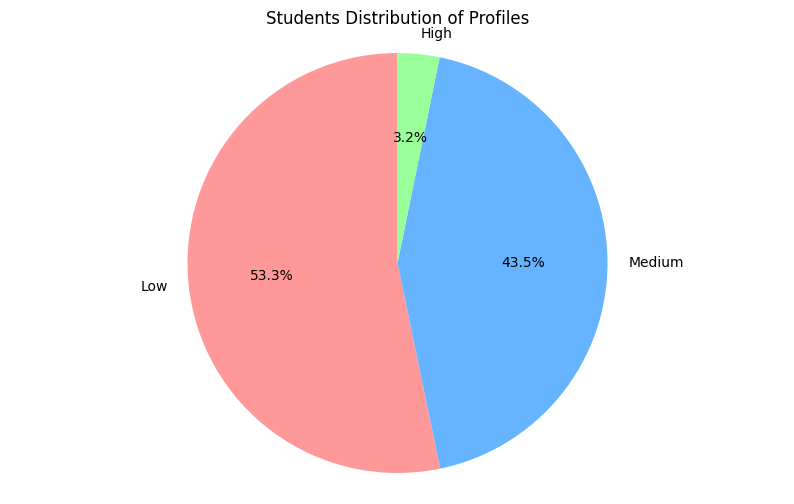

In [5]:
# Contar el número de estuduantes en cada perfil
profile_counts = data['Profile'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(10,6))
plt.pie(profile_counts, labels=profile_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Students Distribution of Profiles')
plt.axis('equal')
plt.show()


### 5) Convert the Profile column into a Categorical Int

You have already created a column with three different values: 'Low', 'Medium', 'High'. These are Categorical values. But, it is important to notice that Neural Networks works better with numbers, since we apply mathematical operations to them.

Next you need to convert Profile values from Low, Medium and High, to 0, 1 and 2. IMPORTANT, the order does not matter, but make sure you always assign the same number to Low, same number to Medium and same number to High.

Make sure to use the fit_transform method from LabelEncoder.

In [6]:
# Inicializar el LabelEncoder
label_encoder = LabelEncoder()

# Convertir la columna 'Profile' a valores categóricos enteros
data['Profile_Categorical'] = label_encoder.fit_transform(data['Profile'])

# Verificar la nueva columna
data[['Profile', 'Profile_Categorical']].head()

,Profile,Profile_Categorical
0,Medium,2
1,Medium,2
2,Low,1
3,Medium,2
4,Low,1


### 6) Select the columns for your model.

Same as the last excersice we need a dataset for features and a dataset for label.

- Create the following dataset:
   - A dataset with the columns for the model.
   - From that data set generate the 'X' dataset. This dataset will have all the features (make sure Profile is NOT in this dataset)
   - Generate a second 'y' dataset, This dataset will only have our label column, which is 'Profile'.
   - Generate the Train and Test datasets for each X and y:
      - X_train with 80% of the data
      - X_test with 20% of the data
      - y_train with 80% of the data
      - y_test with 20% of the data

In [7]:
# Seleccionar las columnas de características sin 'Profile' incluida
features_columns = [col for col in data.columns if col not in ['Profile', 'Profile_Categorical']]

# Crear dataset X 
X = data[features_columns]

# Crear el dataset y con la columna categórica 'Profile_Categorical'
y = data['Profile_Categorical']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

# Mostrar el tamaño de cada conjunto para verificar 

print(f'Tamaño de X_train: {X_train.shape}')
print(f'Tamaño de X_test: {X_test.shape}')
print(f'Tamaño de y_train: {y_train.shape}')
print(f'Tamaño de y_test: {y_test.shape}')

Tamaño de X_train: (1913, 15)
Tamaño de X_test: (479, 15)
Tamaño de y_train: (1913,)
Tamaño de y_test: (479,)


### 7) All Feature datasets in the same scale.

Use StandardScaler to make sure all features in the X_train and X_test datasets are on the same scale.


Standardization transforms your data so that it has a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms perform better when the input features are on a similar scale.

Reason for Using StandardScaler:
- Consistent Scale: Features with different scales (e.g., age in years, income in dollars) can bias the model. StandardScaler ensures all features contribute equally.
- Improved Convergence: Algorithms like gradient descent converge faster with standardized data.
- Regularization: Helps in achieving better performance in regularization methods like Ridge and Lasso regression.


In [8]:
# Inicializar el StandarScaler 
scaler = StandardScaler()

# Ajustar el escalador al conjunto de entrenaminto y transformar X_train y X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Mostrar los primeros registros escalados para verificar 
#print(f'Primeros 5 registros de X_train escalados:\n{X_train_scaled[:5]}')
#print(f'Primeros 5 registros de X_test escalados:\n{X_test_scaled[:5]}')

### 8. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention based on the X_train size and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with the number of different values in the y dataset, activation function = to sofmax

This last part of the output layer is super important, since we want to do a classification and not a regression, we will use activation functions that fits better a classification scenario.

In [9]:
# Definir el número de clases basado en las diferentes categórias en y_train
num_classes = len(np.unique(y_train))

# Crear el modelo secuencial
model = Sequential()

# Capa de entrada (input layer) con 64 unidades, función de activación ReLu
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Capa oculata (hidden layer) con 32 unidades, función de activación ReLu
model.add(Dense(32, activation='relu'))

# Capan de salida (output layer) con el número de clases, función de activación sofmax
model.add(Dense(num_classes, activation='softmax'))

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 9. Compile your Neural Network
- Choose Adam as the optimizer
- And sparse_categorical_crossentropy as the Loss function
- Also add the following metrics: accuracy

In [10]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,203 (12.51 KB)

 Trainable params: 3,203 (12.51 KB)

 Non-trainable params: 0 (0.00 B)

### 10. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [11]:
# Entrenar el modelo con los parámetros especificados 
history = model.fit(X_train_scaled, y_train, 
                    epochs=50, 
                    batch_size=10,
                    validation_split= 0.2)

# Mostrar los resultados del entrenamiento
print(history.history.keys())

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6639 - loss: 0.7637 - val_accuracy: 0.9452 - val_loss: 0.2329
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9485 - loss: 0.1929 - val_accuracy: 0.9608 - val_loss: 0.1411
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9630 - loss: 0.1173 - val_accuracy: 0.9582 - val_loss: 0.1064
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9679 - loss: 0.0892 - val_accuracy: 0.9739 - val_loss: 0.0906
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9776 - loss: 0.0664 - val_accuracy: 0.9687 - val_loss: 0.0749
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9858 - loss: 0.0492 - val_accuracy: 0.9739 - val_loss: 0.0666
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9855 - loss: 0.0423 - val_accuracy: 0.9765 - val_loss: 0.0581
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9882 - loss: 0.0364 - val_accuracy: 0.

### 11. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Accuracy and the Validation Accuracy
   - X Label = Epochs
   - Y Label = Accuracy
   - Title = Model Accuracy over Epochs
- In a second graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Model Loss over Epochs

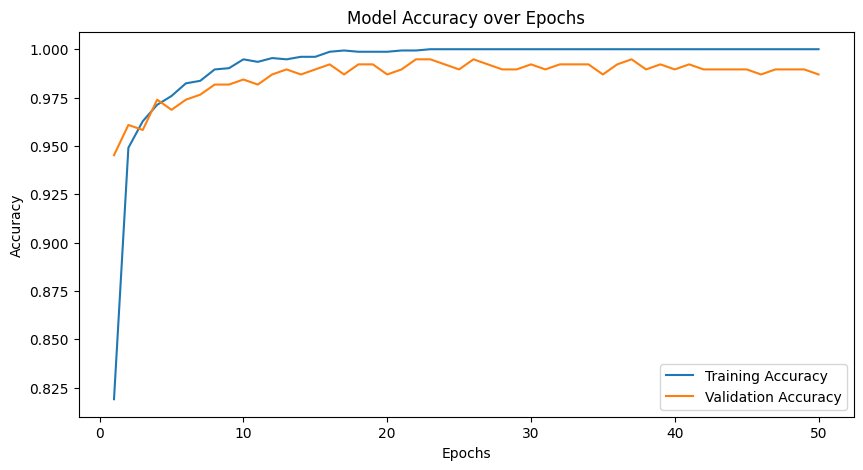

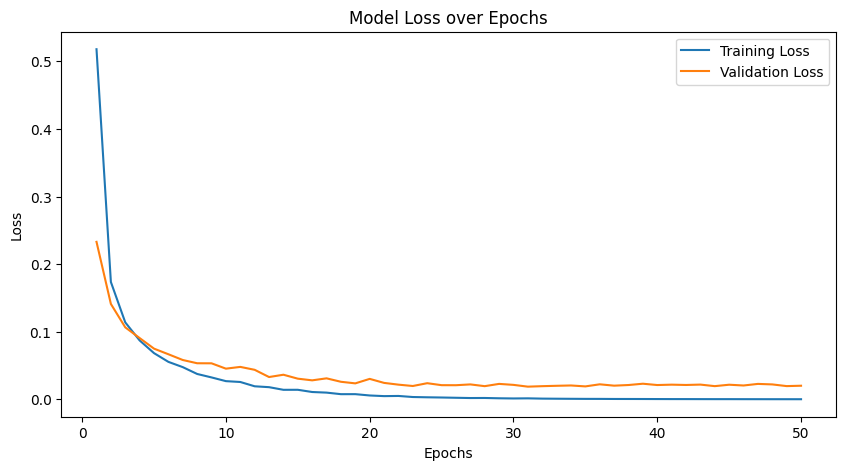

In [12]:
# Obtener la precisión y la pérdida del historial de entrenamiento
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

# Gráfico de precisión (Training Accuracy y Validation Accuracy)
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Gráfico de pérdida (Training Loss y Validation Loss)
plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### 12. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

In [13]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

# Resultados
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9900 - loss: 0.0843  
Test Loss: 0.1165141612291336
Test Accuracy: 0.9812108278274536


### 13. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- Replace the 'Low', 'Medium' and 'High' to your actual and predicted values.
- How good was your model?

In [14]:
# Hacer predicciones sobre el conjunto de prueba
y_pred_prob = model.predict(X_test_scaled)

# Convertir las probabilidades de las predicciones a clases (el índice del valor máximo en cada predicción)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convertir los valores numéricos de vuelta a las etiquetas originales (Low, Medium, High)
label_encoder = LabelEncoder()
label_encoder.fit(['Low', 'Medium', 'High'])
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Imprimir las predicciones junto con los valores reales
for i in range(len(y_test)):
    print(f'Actual: {y_test_labels[i]} - Predicted: {y_pred_labels[i]}')

# Evaluación general
correct_predictions = np.sum(y_test_labels == y_pred_labels)
total_predictions = len(y_test_labels)
accuracy = correct_predictions / total_predictions

print(f'Accuracy of manual comparison: {accuracy:.2f}')


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Medium
Actual: High - Predicted: High
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Medium
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Medium
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Medium
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: 

### 14. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction 
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

* Dataset Data Engineering: No se realizaron cambios en las características seleccionadas con anterioridad, con  el fin de comparar con el siguiente modelo al eliminar ciertas características. 

* Model Definition:Se agregó una capa oculta adicional para aumentar la capacidad del modelo, y se incluyó una capa de dropout del 20% para evitar el sobreajuste.

* Model Compile: Se cambió el optimizador a RMSprop para probar un enfoque de descenso de gradiente con ajustes adaptativos de la tasa de aprendizaje.

* Model Training: Se aumentó el número de épocas a 70 para permitir más tiempo de aprendizaje y se redujo el tamaño del lote a 5 para actualizaciones más frecuentes.

In [15]:
# Modelo 2: Definición
model2 = Sequential()
model2.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.2))  # Dropout para prevenir sobreajuste
model2.add(Dense(16, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

# Compilación del modelo 2
model2.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo 2
history2 = model2.fit(X_train_scaled, y_train, 
                      epochs=70, 
                      batch_size=5, 
                      validation_split=0.2)

Epoch 1/70


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


306/306 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7966 - loss: 0.5449 - val_accuracy: 0.9399 - val_loss: 0.1972
Epoch 2/70
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9490 - loss: 0.1910 - val_accuracy: 0.9426 - val_loss: 0.1383
Epoch 3/70
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9661 - loss: 0.1193 - val_accuracy: 0.9530 - val_loss: 0.1180
Epoch 4/70
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9618 - loss: 0.1071 - val_accuracy: 0.9634 - val_loss: 0.1047
Epoch 5/70
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9760 - loss: 0.0609 - val_accuracy: 0.9504 - val_loss: 0.1264
Epoch 6/70
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9732 - loss: 0.0789 - val_accuracy: 0.9687 - val_loss: 0.0941
Epoch 7/70
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9700 - loss: 0.0888 - val_accuracy: 0.9661 - val_loss: 0.1115
Epoch 8/70
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9733 - loss: 0.0945 - val_accuracy: 0.9713 - val_

In [16]:
# Hacer predicciones con el Modelo 2
y_pred_prob_model2 = model2.predict(X_test_scaled)

# Convertir las probabilidades en clases (la clase con mayor probabilidad)
y_pred_model2 = np.argmax(y_pred_prob_model2, axis=1)

# Inversión de codificación para las etiquetas originales (Low, Medium, High)
y_test_labels_model2 = label_encoder.inverse_transform(y_test)
y_pred_labels_model2 = label_encoder.inverse_transform(y_pred_model2)

# Imprimir las predicciones y los valores reales para el Modelo 2
print("Predicciones del Modelo 2:")
for i in range(len(y_test)):
    print(f'Actual: {y_test_labels_model2[i]} - Predicted: {y_pred_labels_model2[i]}')

# Evaluar el modelo 2
test_loss_model2, test_accuracy_model2 = model2.evaluate(X_test_scaled, y_test)
print(f'Modelo 2 - Test Loss: {test_loss_model2}, Test Accuracy: {test_accuracy_model2}')


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predicciones del Modelo 2:
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Medium
Actual: High - Predicted: High
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Medium
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Medium
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Medium
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Medium
A

#### Model 3:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

* Dataset Data Engineering: Se eliminaron las siguientes variables del conjunto de datos, ya que se consideraron menos relevantes para la predicción.

- StudentID (solo un identificador único)
- Gender y Ethnicity (a menos que se espere que afecten directamente el rendimiento académico, pueden ser excluidas para evitar sesgos)
- Sports, Music y Volunteering (actividades extracurriculares que tienen menos impacto directo en el GPA).

* Model Definition: Se mantuvo la arquitectura básica de la red neuronal con dos capas ocultas y se incluyó una capa Dropout del 20% para prevenir el sobreajuste. La capa de entrada sigue teniendo 64 neuronas, y la segunda capa oculta con 32 neuronas para mantener una estructura profunda pero simple.

* Model Compile: No se hicieron cambios en el optimizador o la función de pérdida. Se mantuvo el optimizador Adam y la función de pérdida sparse_categorical_crossentropy, que son adecuadas para la tarea de clasificación multiclase.

* Model Training: El entrenamiento se realizó con el conjunto de datos reducido, pero se mantuvieron los mismos parámetros de entrenamiento:
Epochs: 50 épocas.
Batch Size: 10 (tamaño del lote para la actualización de pesos).
Validation Split: 20% de los datos de entrenamiento se usaron para validación.

In [17]:
# Modelo 3
# Eliminar las columnas menos importantes
columns_to_drop = ['StudentID', 'Gender', 'Ethnicity', 'Sports', 'Music', 'Volunteering']

# Crear nuevo conjunto de datos sin las columnas menos importantes
X_train_reduced = X_train.drop(columns=columns_to_drop)
X_test_reduced = X_test.drop(columns=columns_to_drop)

# Definir el modelo con las mismas capas pero con el conjunto de datos reducido
model_reduced = Sequential()
model_reduced.add(Dense(64, input_dim=X_train_reduced.shape[1], activation='relu'))
model_reduced.add(Dense(32, activation='relu'))
model_reduced.add(Dropout(0.2))  # Dropout para prevenir sobreajuste
model_reduced.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo reducido
model_reduced.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo reducido
history_reduced = model_reduced.fit(X_train_reduced, y_train, 
                                    epochs=50, 
                                    batch_size=10, 
                                    validation_split=0.2)

Epoch 1/50


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6543 - loss: 0.9467 - val_accuracy: 0.9034 - val_loss: 0.2379
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9014 - loss: 0.2645 - val_accuracy: 0.9112 - val_loss: 0.2111
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9017 - loss: 0.2494 - val_accuracy: 0.9347 - val_loss: 0.1969
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9065 - loss: 0.2205 - val_accuracy: 0.9295 - val_loss: 0.1777
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9238 - loss: 0.1866 - val_accuracy: 0.9478 - val_loss: 0.1498
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9307 - loss: 0.1768 - val_accuracy: 0.9530 - val_loss: 0.1287
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9510 - loss: 0.1542 - val_accuracy: 0.9478 - val_loss: 0.1486
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9417 - loss: 0.1701 - val_accuracy: 0.9608 - val_

In [18]:
# Hacer predicciones con el Modelo Reducido (Modelo 3)
y_pred_prob_model3 = model_reduced.predict(X_test_reduced)

# Convertir las probabilidades en clases
y_pred_model3 = np.argmax(y_pred_prob_model3, axis=1)

# Inversión de codificación para las etiquetas originales
y_test_labels_model3 = label_encoder.inverse_transform(y_test)
y_pred_labels_model3 = label_encoder.inverse_transform(y_pred_model3)

# Imprimir las predicciones y los valores reales para el Modelo 3
print("Predicciones del Modelo 3:")
for i in range(len(y_test)):
    print(f'Actual: {y_test_labels_model3[i]} - Predicted: {y_pred_labels_model3[i]}')

# Evaluar el modelo 3
test_loss_model3, test_accuracy_model3 = model_reduced.evaluate(X_test_reduced, y_test)
print(f'Modelo 3 - Test Loss: {test_loss_model3}, Test Accuracy: {test_accuracy_model3}')


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Predicciones del Modelo 3:
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Medium
Actual: High - Predicted: High
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Medium
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Medium
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Medium
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Low - Predicted: Low
Actual: Medium - Predicted: Medium
Actual: Medium - Predicted: Medium
Actu

# Comparar resultados 

In [19]:
# Evaluar los modelos en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

test_loss2, test_accuracy2 = model2.evaluate(X_test_scaled, y_test)

test_loss_reduced, test_accuracy_reduced = model_reduced.evaluate(X_test_reduced, y_test)

# Comparar los resultados de los tres modelos
print(f"Modelo 1 - Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
print(f"Modelo 2 - Test Loss: {test_loss_model2}, Test Accuracy: {test_accuracy_model2}")
print(f"Modelo 3 - Test Loss: {test_loss_model3}, Test Accuracy: {test_accuracy_model3}")



15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9900 - loss: 0.0843 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9858 - loss: 0.1679 
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9773 - loss: 0.0810 
Modelo 1 - Test Loss: 0.1165141612291336, Test Accuracy: 0.9812108278274536
Modelo 2 - Test Loss: 0.19956345856189728, Test Accuracy: 0.9791231751441956
Modelo 3 - Test Loss: 0.0574507936835289, Test Accuracy: 0.9832985401153564


# Tabla con los datos de function de perdida y la métrica configurada, esto para los tres modelos generados.

In [20]:
# Crear un diccionario con los resultados obtenidos de los tres modelos
data = {
    'Model': ['Original', 'Model 2', 'Model 3 (Reduced)'],
    'Test Loss': [test_loss, test_loss2, test_loss_reduced],
    'Test Accuracy': [test_accuracy, test_accuracy2, test_accuracy_reduced]
}

# Convertir a DataFrame para presentar los resultados
results_df = pd.DataFrame(data)
results_df

,Model,Test Loss,Test Accuracy
0,Original,0.116514,0.981211
1,Model 2,0.199563,0.979123
2,Model 3 (Reduced),0.057451,0.983299


#  Tabla donde apliquen sus modelos para predecir la clasificación de 5 alumnos de su dataset de prueba.

In [21]:
# Crear un DataFrame con los resultados de las primeras 5 predicciones de cada modelo
results = {
    'Actual': y_test_labels[:5],
    'Predicted_Model_1': y_pred_labels[:5],
    'Predicted_Model_2': y_pred_labels_model2[:5],
    'Predicted_Model_3': y_pred_labels_model3[:5]
}

# Convertir los resultados a un DataFrame
predictions_df = pd.DataFrame(results)
predictions_df

,Actual,Predicted_Model_1,Predicted_Model_2,Predicted_Model_3
0,Low,Low,Low,Low
1,Medium,Medium,Medium,Medium
2,Medium,Medium,Medium,Medium
3,High,High,High,High
4,Low,Low,Low,Low


# Conclusión 

Con base en los resultados obtenidos en la evaluación de los tres modelos generados, podemos observar lo siguiente:

1. **Modelo Original:**
   - Test Loss: 0.116514
   - Test Accuracy: 0.981211
   - Este modelo demostró ser muy preciso, con una precisión del 98.12% en los datos de prueba, y una pérdida moderada de 0.1165. Esto sugiere que el modelo es capaz de generalizar bien en los datos de prueba, lo que indica un buen ajuste.

2. **Modelo 2 (con una capa adicional y dropout):**
   - Test Loss: 0.199563
   - Test Accuracy: 0.979123
   - A pesar de agregar una capa oculta adicional y un dropout para evitar el sobreajuste, este modelo tuvo una precisión ligeramente menor en comparación con el modelo original, con una precisión del 97.91% y una mayor pérdida de 0.1996. Esto sugiere que la arquitectura más compleja no mejoró significativamente el rendimiento y posiblemente el dropout no fue necesario en este caso.

3. **Modelo 3 (con eliminación de características menos relevantes):**
   - Test Loss: 0.057451
   - Test Accuracy: 0.983299
   - Este modelo, al reducir el número de características eliminando aquellas menos relevantes, logró la mejor precisión de los tres modelos, alcanzando un 98.33%, con la pérdida más baja (0.0575). Esto indica que eliminar características no esenciales puede ayudar a mejorar la capacidad del modelo para generalizar y obtener mejores resultados.

### Comparación de predicciones:
En la tabla de predicciones de los tres modelos para cinco estudiantes:
- **El modelo original** y el **modelo 3** coincidieron en todas las predicciones.
- **El modelo 2** tuvo resultados similares, pero con una ligera desviación en uno de los casos.

### Conclusión final:
El **Modelo 3**, que eliminó características menos relevantes, parece ser el más eficiente en términos de precisión y pérdida, lo que sugiere que un enfoque más simple, pero más dirigido a características importantes, puede mejorar el rendimiento de los modelos de clasificación. Esto también refuerza la importancia de la ingeniería de características en la mejora de los resultados de los modelos de aprendizaje automático.